# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -5 Watch Image Dataset

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9135193745006146984
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11877510131720111450
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [4]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [5]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [6]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [10]:
data = pd.DataFrame()
main_path = 'images/'
name=[]


pa = 'images'

entry = []
for filename in os.listdir(pa):
    entry.append(filename)
print(entry)
l=[]
for i in entry:
    name.append(os.listdir('images/'+i))
    l.append(i)

len(name)

pn=[]
paths = []
classes = []
lab=[]
for i in range(len(name)):
    for j in name[i]:
        pn.append(j)
        paths.append(main_path+entry[i]+'/'+j)
        classes.append(entry[i])
        lab.append(i)

print(l)

print(len(name))
      
print(len(pn))

print(len(paths))

# pn

data['images_name']= pn


data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

['Audemars Piguet', 'Breguet', 'Breitling', 'Maurice Lacroix', 'Omega', 'Patek Philippe', 'Rado', 'Rolex', 'Tissot', 'Vacheron Constantin']
['Audemars Piguet', 'Breguet', 'Breitling', 'Maurice Lacroix', 'Omega', 'Patek Philippe', 'Rado', 'Rolex', 'Tissot', 'Vacheron Constantin']
10
2000
2000
2000


,images_name,classes,path
0,001_90921d4b.jpg,Audemars Piguet,images/Audemars Piguet/001_90921d4b.jpg
1,002_4e6cca68.jpg,Audemars Piguet,images/Audemars Piguet/002_4e6cca68.jpg
2,003_315c47ef.jpg,Audemars Piguet,images/Audemars Piguet/003_315c47ef.jpg
3,004_b949761a.jpg,Audemars Piguet,images/Audemars Piguet/004_b949761a.jpg
4,005_f1723c76.jpg,Audemars Piguet,images/Audemars Piguet/005_f1723c76.jpg


In [12]:
li = data.classes.unique()

li=list(li)


In [13]:
li

['Audemars Piguet',
 'Breguet',
 'Breitling',
 'Maurice Lacroix',
 'Omega',
 'Patek Philippe',
 'Rado',
 'Rolex',
 'Tissot',
 'Vacheron Constantin']

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [14]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=128



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']

    image=cv2.imread(p)
#     print(image)
    image=Image.fromarray(image,'RGB')

    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))

    
    pic.append(image)
#     label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [15]:
dataset = im

print(type(im))
# print(type(label))

dataset=np.array(dataset)
# label=np.array(label)

print(type(dataset))
# print(type(label))

<class 'list'>
<class 'numpy.ndarray'>


<ipython-input-16-ad9a3bf570cb>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-16-ad9a3bf570cb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


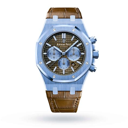

In [16]:
df['im_array']= im
# df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [17]:
df.shape

(2000, 5)

In [18]:
df['label']=lab
# label=df.classes
type(label)

list

In [19]:
label=df['label']

In [20]:
len(li)

10

In [21]:
df.head()

,images_name,classes,path,im_array,pic,label
0,001_90921d4b.jpg,Audemars Piguet,images/Audemars Piguet/001_90921d4b.jpg,"[[[42, 33, 30], [59, 49, 44], [82, 70, 64], [8...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
1,002_4e6cca68.jpg,Audemars Piguet,images/Audemars Piguet/002_4e6cca68.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
2,003_315c47ef.jpg,Audemars Piguet,images/Audemars Piguet/003_315c47ef.jpg,"[[[148, 172, 190], [146, 170, 188], [146, 170,...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
3,004_b949761a.jpg,Audemars Piguet,images/Audemars Piguet/004_b949761a.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",<PIL.Image.Image image mode=RGB size=128x128 a...,0
4,005_f1723c76.jpg,Audemars Piguet,images/Audemars Piguet/005_f1723c76.jpg,"[[[23, 26, 57], [20, 22, 60], [19, 20, 65], [1...",<PIL.Image.Image image mode=RGB size=128x128 a...,0


## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = len(li)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(1600, 128, 128, 3)
(1600,)


In [23]:
num_classes

10

## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [25]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [26]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 15 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [27]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

    


    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)




    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 62)      1736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 62)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 62)       248       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 62)        34658     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 62)       0         
 2D)                                                             
                                                        

Epoch 15/30
50/50 [==============================] - ETA: 0s - loss: 2.0787 - accuracy: 0.2656
Epoch 15: val_accuracy improved from 0.18500 to 0.20750, saving model to model_62_relu_max.hdf5
50/50 [==============================] - 13s 259ms/step - loss: 2.0787 - accuracy: 0.2656 - val_loss: 2.2692 - val_accuracy: 0.2075
Epoch 16/30
50/50 [==============================] - ETA: 0s - loss: 2.0287 - accuracy: 0.2706
Epoch 16: val_accuracy did not improve from 0.20750
50/50 [==============================] - 11s 223ms/step - loss: 2.0287 - accuracy: 0.2706 - val_loss: 2.4353 - val_accuracy: 0.2050
Epoch 17/30
50/50 [==============================] - ETA: 0s - loss: 1.9985 - accuracy: 0.2819
Epoch 17: val_accuracy did not improve from 0.20750
50/50 [==============================] - 12s 229ms/step - loss: 1.9985 - accuracy: 0.2819 - val_loss: 2.9351 - val_accuracy: 0.1525
Epoch 18/30
50/50 [==============================] - ETA: 0s - loss: 1.9912 - accuracy: 0.2875
Epoch 18: val_accuracy d

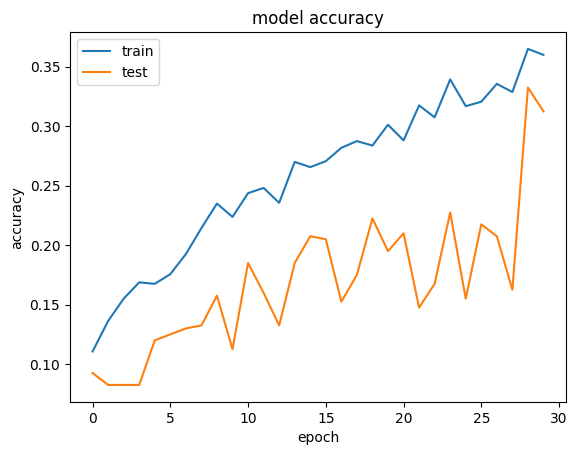

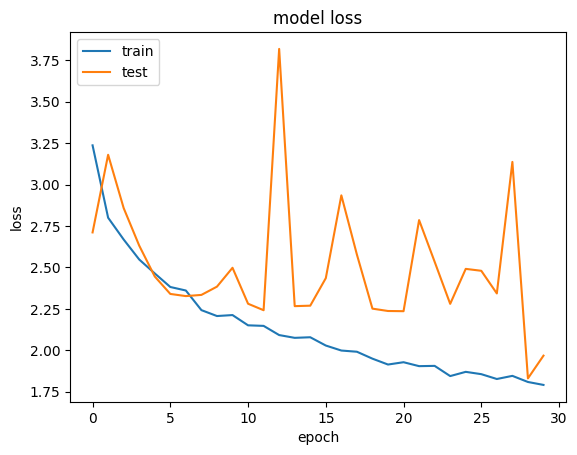

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [28]:
CNN_model(62,'relu','max',30)

# Find the best Relu Variants

In [29]:
act=['relu','elu','gelu','selu','LeakyReLU']

# act2=['selu','LeakyReLU']

#### Best activation with max pooling

relu
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                 

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.0126 - accuracy: 0.2750
Epoch 15: val_accuracy did not improve from 0.21000
50/50 [==============================] - 12s 234ms/step - loss: 2.0126 - accuracy: 0.2750 - val_loss: 2.7630 - val_accuracy: 0.1200
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.0299 - accuracy: 0.2537
Epoch 16: val_accuracy did not improve from 0.21000
50/50 [==============================] - 12s 237ms/step - loss: 2.0299 - accuracy: 0.2537 - val_loss: 2.4217 - val_accuracy: 0.1900
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 1.9751 - accuracy: 0.2850
Epoch 17: val_accuracy did not improve from 0.21000
50/50 [==============================] - 12s 235ms/step - loss: 1.9751 - accuracy: 0.2850 - val_loss: 2.5949 - val_accuracy: 0.1900
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 1.9696 - accuracy: 0.2887
Epoch 18: val_accuracy did not improve from 0.21000
50/50 [=========

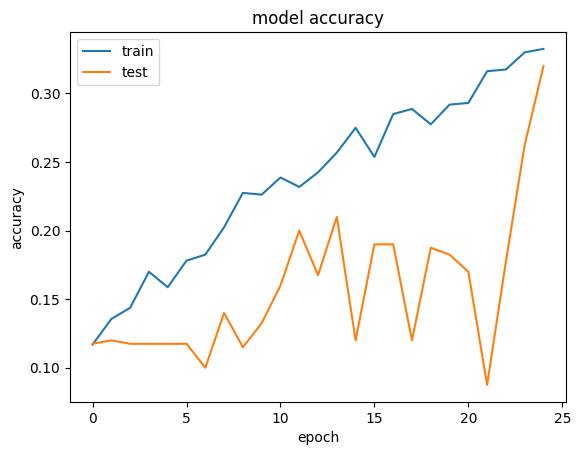

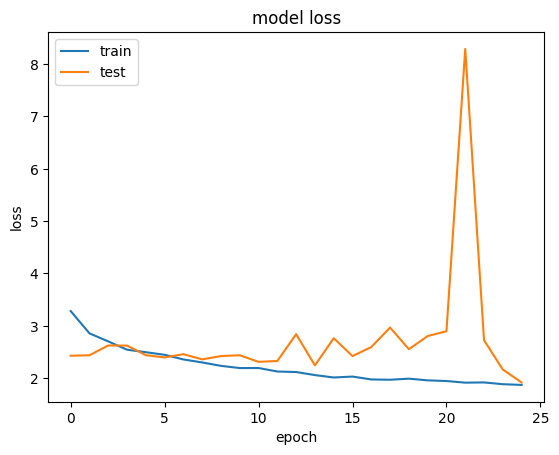

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                  

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.0297 - accuracy: 0.2587
Epoch 15: val_accuracy improved from 0.21750 to 0.22000, saving model to model_64_elu_max.hdf5
50/50 [==============================] - 16s 313ms/step - loss: 2.0297 - accuracy: 0.2587 - val_loss: 2.0911 - val_accuracy: 0.2200
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.0148 - accuracy: 0.2637
Epoch 16: val_accuracy improved from 0.22000 to 0.23000, saving model to model_64_elu_max.hdf5
50/50 [==============================] - 15s 300ms/step - loss: 2.0148 - accuracy: 0.2637 - val_loss: 2.2342 - val_accuracy: 0.2300
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.0015 - accuracy: 0.2713
Epoch 17: val_accuracy did not improve from 0.23000
50/50 [==============================] - 15s 297ms/step - loss: 2.0015 - accuracy: 0.2713 - val_loss: 3.2761 - val_accuracy: 0.2100
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 1.9858 -

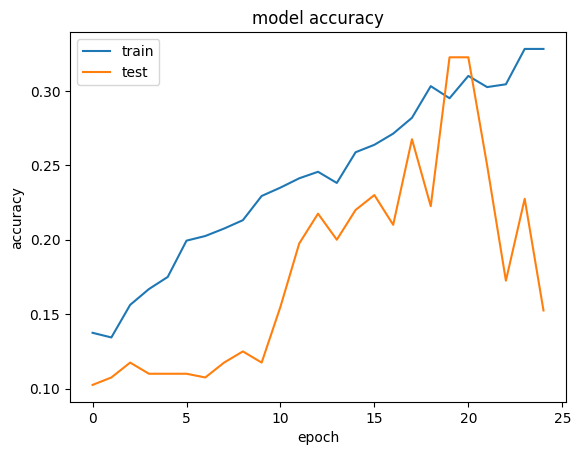

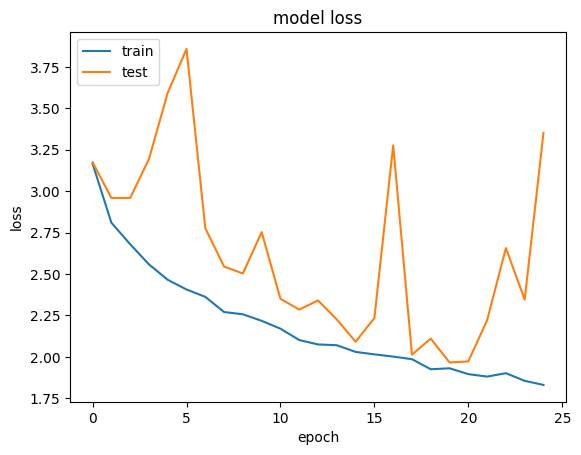

gelu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_24 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
          

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_3/max_pooling2d_12/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelapp.py", line 505, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 687, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 740, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 821, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 782, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/kernelbase.py", line 540, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.8/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.8/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-30-a8eb58b7f8f7>", line 4, in <module>
      CNN_model(64,i,'max',25)
    File "<ipython-input-27-653d1271906e>", line 83, in CNN_model
      history = model.fit(datagen_preprocessing.flow(x_train,y_train,
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_3/max_pooling2d_12/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,126,126,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_3/max_pooling2d_12/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_53672]

In [30]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)
    

In [31]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.3325
1,relu,64,max,25,0.3200
2,elu,64,max,25,0.3225


gelu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.0436 - accuracy: 0.2587
Epoch 15: val_accuracy did not improve from 0.22500
50/50 [==============================] - 22s 428ms/step - loss: 2.0436 - accuracy: 0.2587 - val_loss: 2.6856 - val_accuracy: 0.1500
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.0463 - accuracy: 0.2612
Epoch 16: val_accuracy did not improve from 0.22500
50/50 [==============================] - 21s 410ms/step - loss: 2.0463 - accuracy: 0.2612 - val_loss: 2.7856 - val_accuracy: 0.1700
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.0058 - accuracy: 0.2700
Epoch 17: val_accuracy did not improve from 0.22500
50/50 [==============================] - 21s 411ms/step - loss: 2.0058 - accuracy: 0.2700 - val_loss: 2.6220 - val_accuracy: 0.1625
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 1.9903 - accuracy: 0.2831
Epoch 18: val_accuracy improved from 0.22500 to 0.26250, saving mode

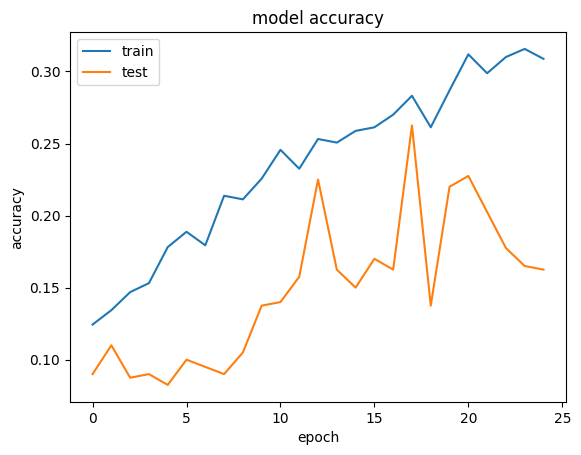

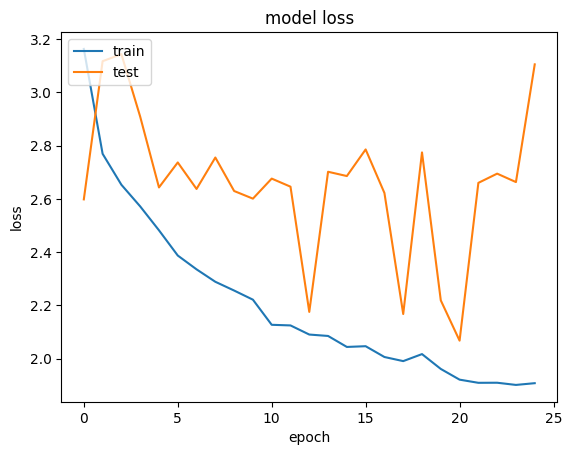

selu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         


<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 g2D)                                                            
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_36 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooli

50/50 [==============================] - ETA: 0s - loss: 2.0706 - accuracy: 0.2500
Epoch 16: val_accuracy did not improve from 0.23500
50/50 [==============================] - 15s 289ms/step - loss: 2.0706 - accuracy: 0.2500 - val_loss: 2.1867 - val_accuracy: 0.2075
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.0381 - accuracy: 0.2519
Epoch 17: val_accuracy did not improve from 0.23500
50/50 [==============================] - 15s 287ms/step - loss: 2.0381 - accuracy: 0.2519 - val_loss: 2.3884 - val_accuracy: 0.1900
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 1.9982 - accuracy: 0.2556
Epoch 18: val_accuracy did not improve from 0.23500
50/50 [==============================] - 14s 277ms/step - loss: 1.9982 - accuracy: 0.2556 - val_loss: 2.5823 - val_accuracy: 0.2025
Epoch 19/25
50/50 [==============================] - ETA: 0s - loss: 1.9891 - accuracy: 0.2806
Epoch 19: val_accuracy improved from 0.23500 to 0.28500, saving model to model_6

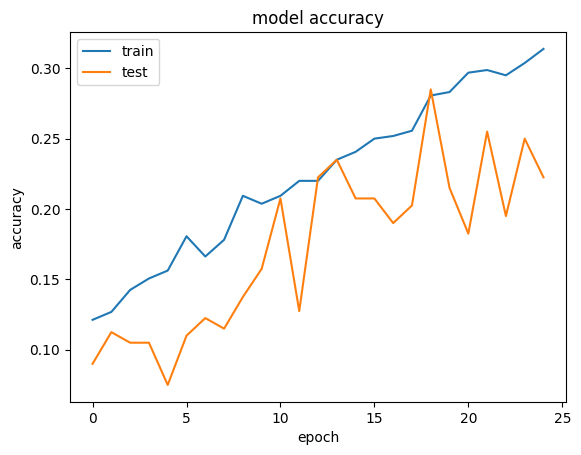

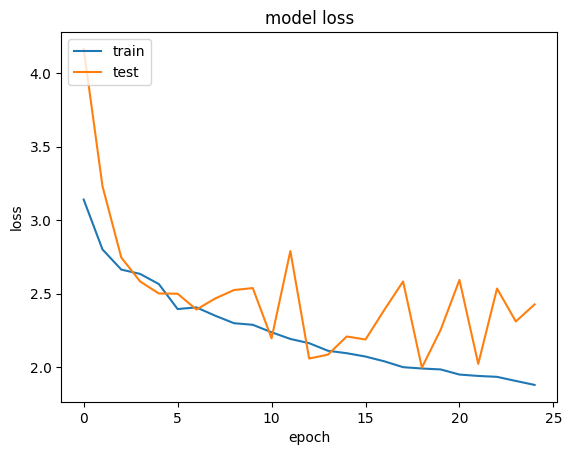

LeakyReLU
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                            

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_45 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1180160   
          

50/50 [==============================] - ETA: 0s - loss: 1.9436 - accuracy: 0.2894
Epoch 20: val_accuracy improved from 0.24000 to 0.32500, saving model to model_64_LeakyReLU_max.hdf5
50/50 [==============================] - 15s 299ms/step - loss: 1.9436 - accuracy: 0.2894 - val_loss: 1.9548 - val_accuracy: 0.3250
Epoch 21/25
50/50 [==============================] - ETA: 0s - loss: 1.9124 - accuracy: 0.3075
Epoch 21: val_accuracy did not improve from 0.32500
50/50 [==============================] - 14s 278ms/step - loss: 1.9124 - accuracy: 0.3075 - val_loss: 2.0826 - val_accuracy: 0.2450
Epoch 22/25
50/50 [==============================] - ETA: 0s - loss: 1.9180 - accuracy: 0.3038
Epoch 22: val_accuracy did not improve from 0.32500
50/50 [==============================] - 14s 280ms/step - loss: 1.9180 - accuracy: 0.3038 - val_loss: 2.0376 - val_accuracy: 0.3025
Epoch 23/25
50/50 [==============================] - ETA: 0s - loss: 1.8805 - accuracy: 0.3175
Epoch 23: val_accuracy did not 

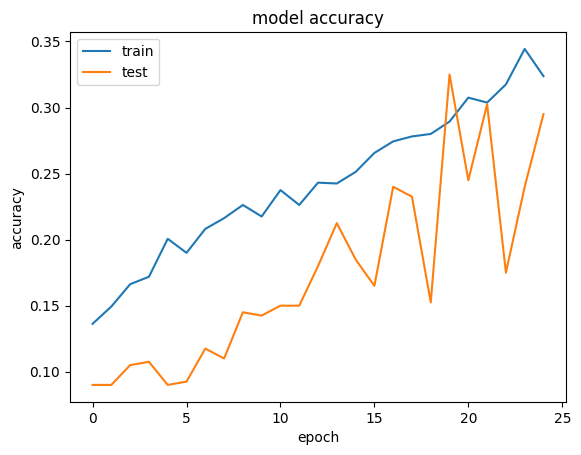

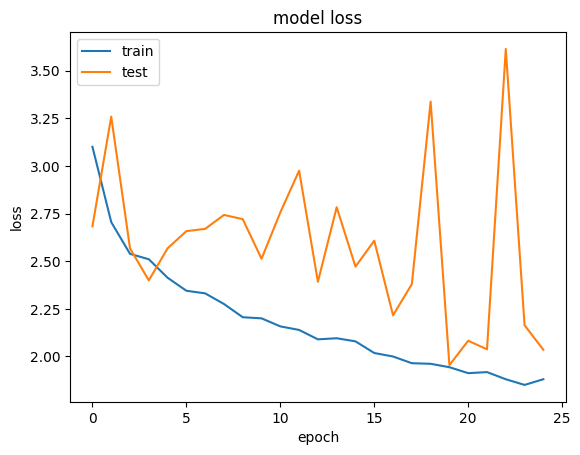

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [32]:
act2=['gelu','selu','LeakyReLU']

for i in act2:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)

In [33]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.3325
1,relu,64,max,25,0.3200
2,elu,64,max,25,0.3225
3,gelu,64,max,25,0.2625
4,selu,64,max,25,0.2850
5,LeakyReLU,64,max,25,0.3250


### Finding best activation function with average pooling

relu
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

50/50 [==============================] - ETA: 0s - loss: 2.1284 - accuracy: 0.2419
Epoch 15: val_accuracy did not improve from 0.21000
50/50 [==============================] - 11s 207ms/step - loss: 2.1284 - accuracy: 0.2419 - val_loss: 2.6776 - val_accuracy: 0.1300
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.0970 - accuracy: 0.2469
Epoch 16: val_accuracy did not improve from 0.21000
50/50 [==============================] - 11s 213ms/step - loss: 2.0970 - accuracy: 0.2469 - val_loss: 2.5611 - val_accuracy: 0.1175
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.0337 - accuracy: 0.2675
Epoch 17: val_accuracy did not improve from 0.21000
50/50 [==============================] - 11s 215ms/step - loss: 2.0337 - accuracy: 0.2675 - val_loss: 2.5841 - val_accuracy: 0.1650
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 2.0521 - accuracy: 0.2612
Epoch 18: val_accuracy did not improve from 0.21000
50/50 [=====================

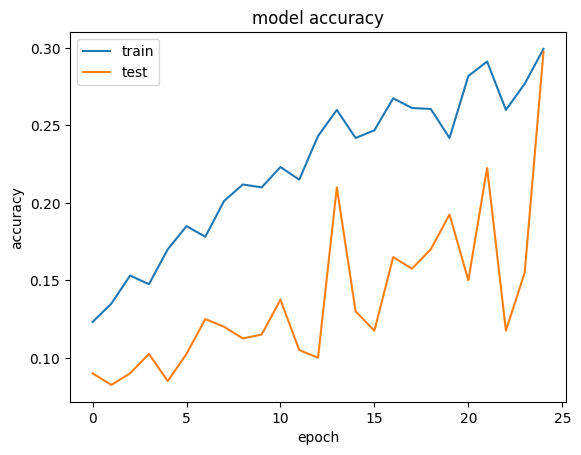

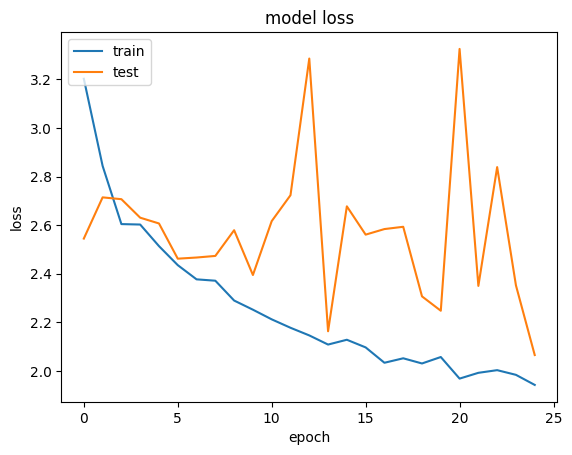

elu
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_56 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                  

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 batch_normalization_60 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_61 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_34 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_62 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_35 

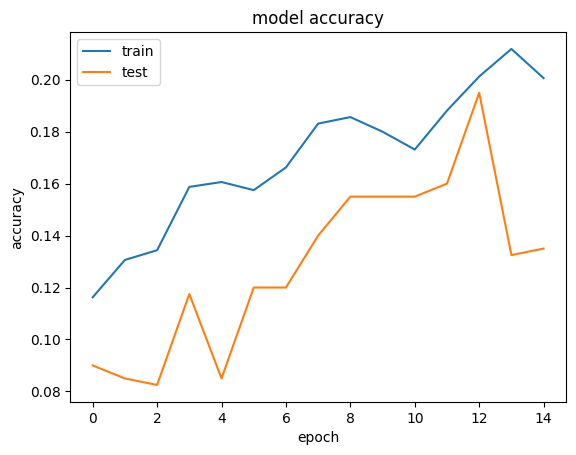

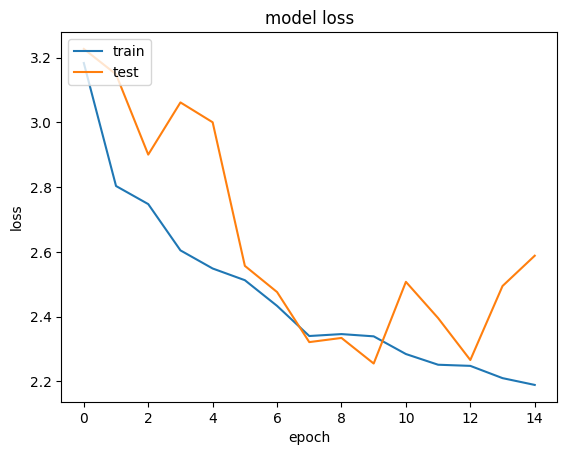

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_63 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

50/50 [==============================] - ETA: 0s - loss: 2.1424 - accuracy: 0.2375
Epoch 15: val_accuracy did not improve from 0.18750
Restoring model weights from the end of the best epoch: 13.
50/50 [==============================] - 18s 358ms/step - loss: 2.1424 - accuracy: 0.2375 - val_loss: 2.3302 - val_accuracy: 0.1850
Epoch 15: early stopping
Training time: 0:04:47.473792
Test score: 2.217339038848877
Test accuracy: 0.1875
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


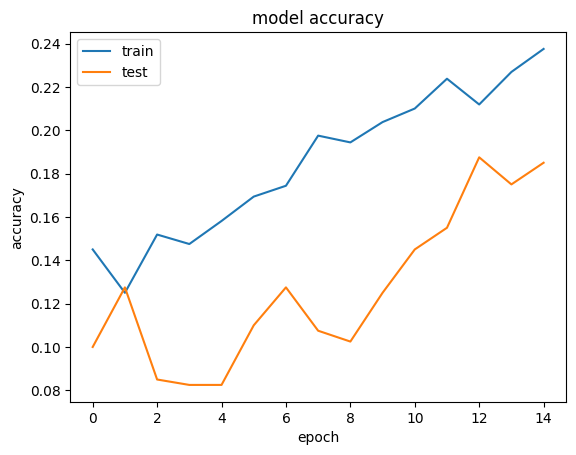

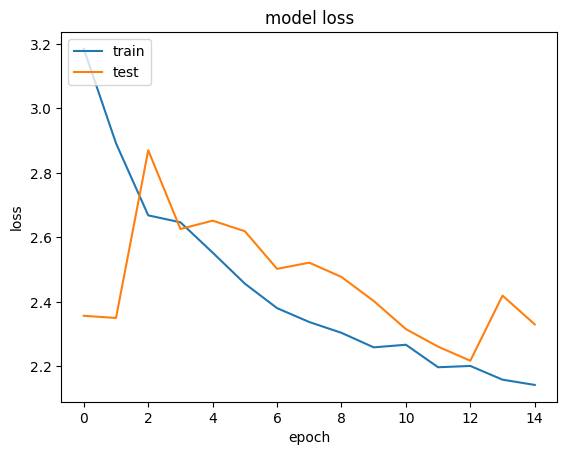

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


selu
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_70 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_13 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                                

50/50 [==============================] - 14s 274ms/step - loss: 2.2049 - accuracy: 0.1894 - val_loss: 2.1283 - val_accuracy: 0.2200
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.1726 - accuracy: 0.2113
Epoch 16: val_accuracy did not improve from 0.22000
50/50 [==============================] - 12s 239ms/step - loss: 2.1726 - accuracy: 0.2113 - val_loss: 2.3381 - val_accuracy: 0.1575
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.1441 - accuracy: 0.2100
Epoch 17: val_accuracy did not improve from 0.22000
50/50 [==============================] - 12s 240ms/step - loss: 2.1441 - accuracy: 0.2100 - val_loss: 2.2560 - val_accuracy: 0.1650
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 2.1232 - accuracy: 0.2294
Epoch 18: val_accuracy did not improve from 0.22000
50/50 [==============================] - 14s 270ms/step - loss: 2.1232 - accuracy: 0.2294 - val_loss: 2.2665 - val_accuracy: 0.1600
Epoch 19/25
50/50 [============

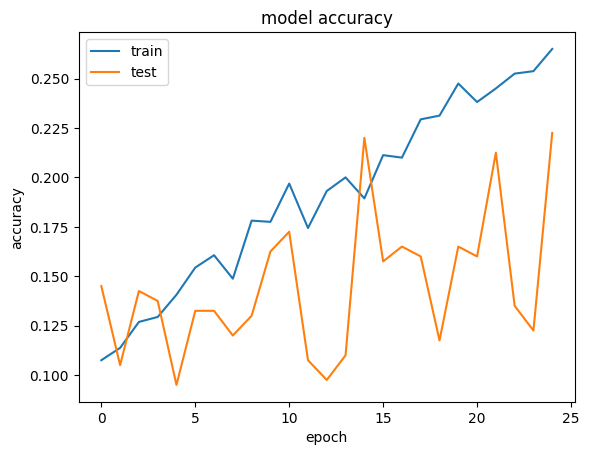

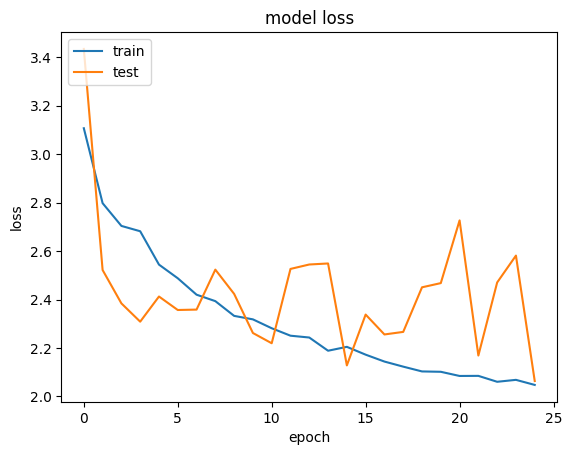

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


LeakyReLU
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_77 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_17 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                           

50/50 [==============================] - 13s 256ms/step - loss: 2.2019 - accuracy: 0.2125 - val_loss: 2.2354 - val_accuracy: 0.1450
Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.1901 - accuracy: 0.1900
Epoch 15: val_accuracy did not improve from 0.15250
Restoring model weights from the end of the best epoch: 13.
50/50 [==============================] - 15s 289ms/step - loss: 2.1901 - accuracy: 0.1900 - val_loss: 2.5804 - val_accuracy: 0.1350
Epoch 15: early stopping
Training time: 0:03:43.175502
Test score: 2.284148931503296
Test accuracy: 0.1525000035762787
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


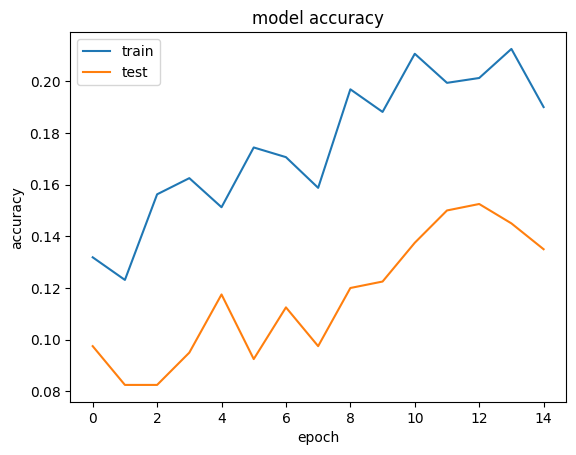

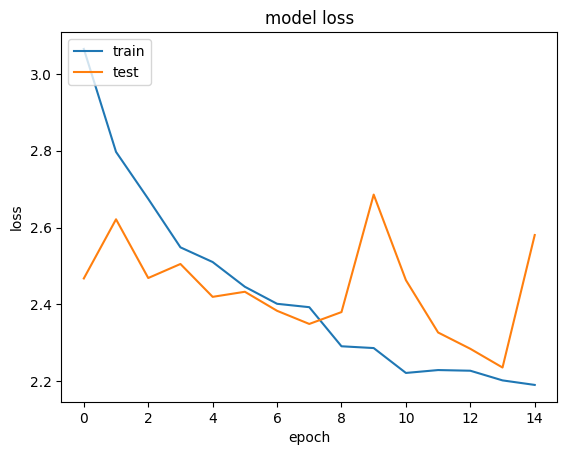

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [34]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

In [35]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.3325
1,relu,64,max,25,0.3200
2,elu,64,max,25,0.3225
3,gelu,64,max,25,0.2625
4,selu,64,max,25,0.2850
5,LeakyReLU,64,max,25,0.3250
6,relu,64,average,25,0.2975
7,elu,64,average,25,0.1950
8,gelu,64,average,25,0.1875
9,selu,64,average,25,0.2225


In [38]:
gk = df_r.groupby('pooling').mean()
gk.head()

<ipython-input-38-88fbdc02e871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('pooling').mean()


,test_accuracy
pooling,
average,0.211000
max,0.307917


In [39]:
gk = df_r.groupby('activation_function').mean()
gk.head()

<ipython-input-39-92edb843cd6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('activation_function').mean()


,test_accuracy
activation_function,
LeakyReLU,0.238750
elu,0.258750
gelu,0.225000
relu,0.316667
selu,0.253750


## Conclusion regarding the performance of Activation function

seeing all the results relu to give the best results for max and average type poolings, however on average relu gives best result hence we will chose relu for futrther analysis

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results compared overall

## The best activation function is 'RELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_84 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                  

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.1349 - accuracy: 0.2319
Epoch 15: val_accuracy did not improve from 0.17750
Restoring model weights from the end of the best epoch: 12.
50/50 [==============================] - 6s 115ms/step - loss: 2.1349 - accuracy: 0.2319 - val_loss: 2.2135 - val_accuracy: 0.1775
Epoch 15: early stopping
Training time: 0:01:34.091290
Test score: 2.26279354095459
Test accuracy: 0.17749999463558197
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


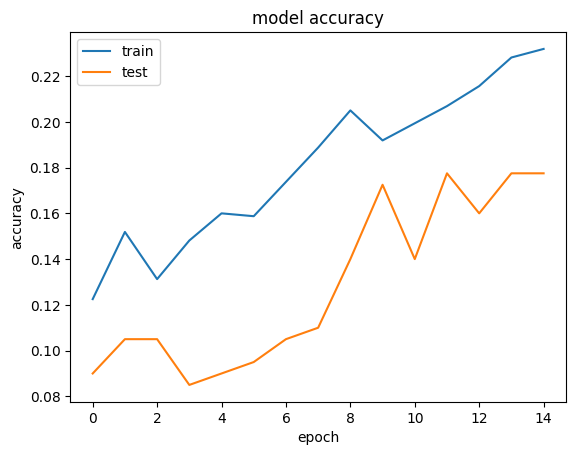

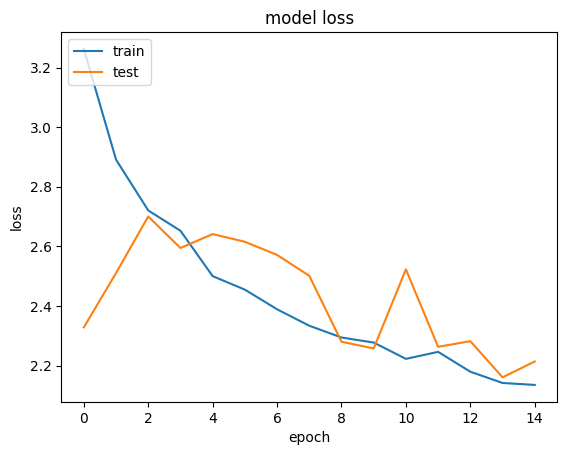

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_91 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                  

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.1441 - accuracy: 0.2412
Epoch 15: val_accuracy did not improve from 0.22250
50/50 [==============================] - 6s 124ms/step - loss: 2.1441 - accuracy: 0.2412 - val_loss: 2.3862 - val_accuracy: 0.1800
Epoch 16/25
50/50 [==============================] - ETA: 0s - loss: 2.0850 - accuracy: 0.2469
Epoch 16: val_accuracy improved from 0.22250 to 0.23000, saving model to model_32_relu_max.hdf5
50/50 [==============================] - 8s 148ms/step - loss: 2.0850 - accuracy: 0.2469 - val_loss: 2.1999 - val_accuracy: 0.2300
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 2.0335 - accuracy: 0.2537
Epoch 17: val_accuracy did not improve from 0.23000
50/50 [==============================] - 6s 126ms/step - loss: 2.0335 - accuracy: 0.2537 - val_loss: 2.7123 - val_accuracy: 0.1775
Epoch 18/25
50/50 [==============================] - ETA: 0s - loss: 2.0143 - accuracy: 0.2656
Epoch 18: val_accuracy did 

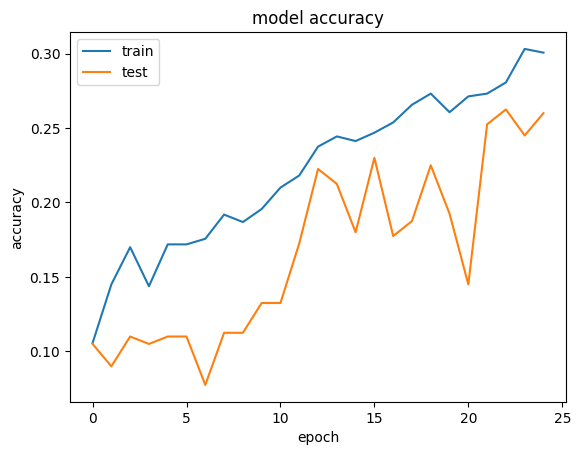

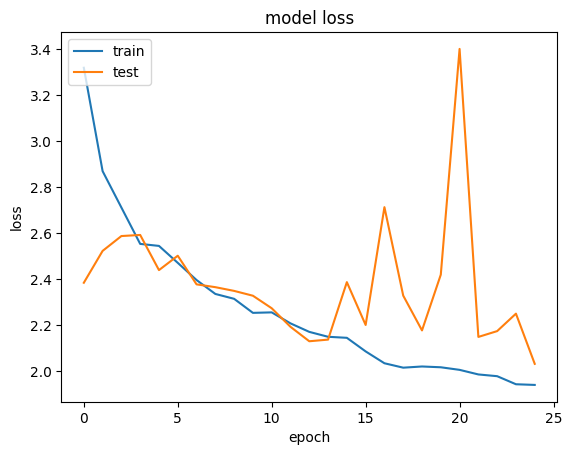

64
Model: "sequential_14"


<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_98 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 batch_nor

Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 2.0265 - accuracy: 0.2781
Epoch 15: val_accuracy did not improve from 0.19500
Restoring model weights from the end of the best epoch: 14.
50/50 [==============================] - 14s 265ms/step - loss: 2.0265 - accuracy: 0.2781 - val_loss: 2.5256 - val_accuracy: 0.1525
Epoch 15: early stopping
Training time: 0:03:33.760932
Test score: 2.2414605617523193
Test accuracy: 0.19499999284744263
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


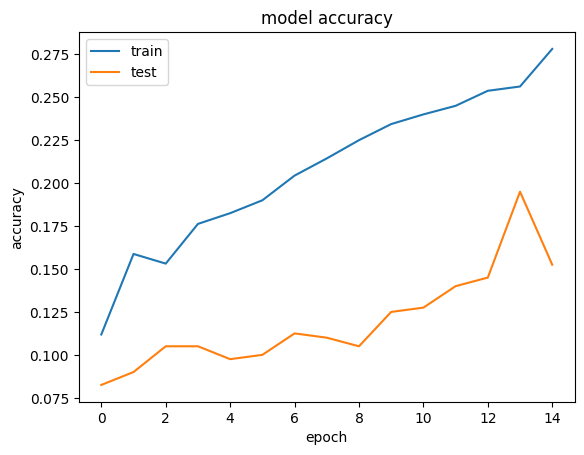

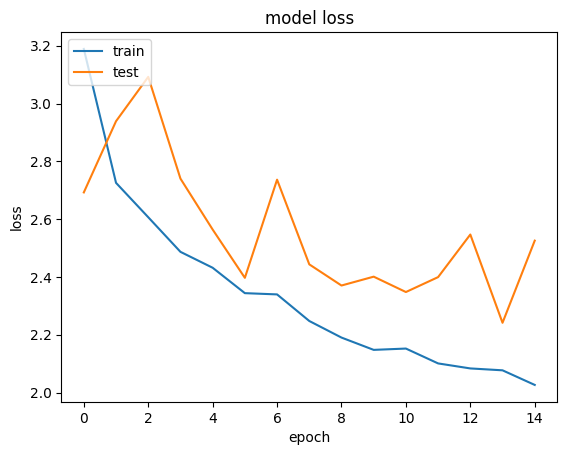

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


128
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_105 (Ba  (None, 63, 63, 128)      512       
 tchNormalization)                                               
                                                                 
 conv2d_61 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                 

Restoring model weights from the end of the best epoch: 15.
50/50 [==============================] - 41s 821ms/step - loss: 2.0813 - accuracy: 0.2488 - val_loss: 2.6817 - val_accuracy: 0.1825
Epoch 15: early stopping
Training time: 0:09:49.041180
Test score: 2.681669235229492
Test accuracy: 0.18250000476837158
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


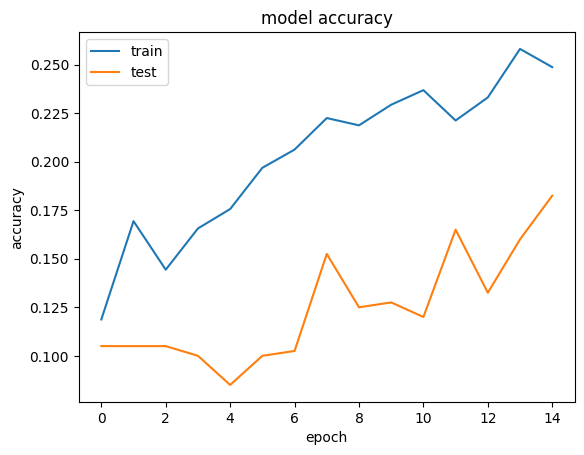

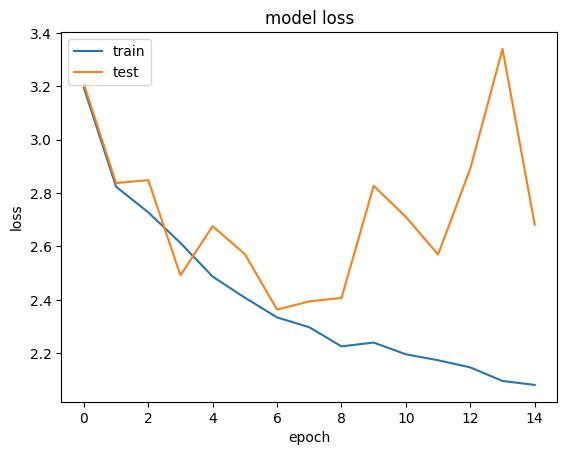

<ipython-input-27-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [40]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'relu','max',25)

In [42]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.3325
1,relu,64,max,25,0.3200
2,elu,64,max,25,0.3225
3,gelu,64,max,25,0.2625
4,selu,64,max,25,0.2850
5,LeakyReLU,64,max,25,0.3250
6,relu,64,average,25,0.2975
7,elu,64,average,25,0.1950
8,gelu,64,average,25,0.1875
9,selu,64,average,25,0.2225


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters. 

### from above results 64 filters give the best results

## the best model is with 'relu' activation function 64 filters and maxpooling can give results from accuracy of 0.27 to 0.32

Saving reluts to a csv file

In [43]:
df_results1=df_r.copy()
df_results1['dataset']='Watche Image Dataset'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,62,max,30,0.3325,Watche Image Dataset
1,relu,64,max,25,0.3200,Watche Image Dataset
2,elu,64,max,25,0.3225,Watche Image Dataset
3,gelu,64,max,25,0.2625,Watche Image Dataset
4,selu,64,max,25,0.2850,Watche Image Dataset


In [44]:
df_results1.to_csv('df_results1_d5.csv',index=False)

In [45]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,62,max,30,0.3325,Watche Image Dataset
5,LeakyReLU,64,max,25,0.3250,Watche Image Dataset
2,elu,64,max,25,0.3225,Watche Image Dataset
1,relu,64,max,25,0.3200,Watche Image Dataset
6,relu,64,average,25,0.2975,Watche Image Dataset
4,selu,64,max,25,0.2850,Watche Image Dataset
3,gelu,64,max,25,0.2625,Watche Image Dataset
12,relu,32,max,25,0.2625,Watche Image Dataset
9,selu,64,average,25,0.2225,Watche Image Dataset
7,elu,64,average,25,0.1950,Watche Image Dataset


Imagenet models were run on kaggle notebook

# Using imagenet winner model

## Resnet

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_____________________________

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/25
50/50 [==============================] - 9s 186ms/step - loss: 2.0411 - accuracy: 0.2675 - val_loss: 2.3743 - val_accuracy: 0.1200

Epoch 00002: val_accuracy improved from 0.08250 to 0.12000, saving model to resnet_model.hdf5
Epoch 3/25
50/50 [==============================] - 10s 201ms/step - loss: 1.8990 - accuracy: 0.3306 - val_loss: 4.5494 - val_accuracy: 0.1200

Epoch 00003: val_accuracy did not improve from 0.12000
Epoch 4/25
50/50 [==============================] - 9s 182ms/step - loss: 1.8840 - accuracy: 0.3175 - val_loss: 2.3735 - val_accuracy: 0.0900

Epoch 00004: val_accuracy did not improve from 0.12000
Epoch 5/25
50/50 [==============================] - 9s 188ms/step - loss: 1.8125 - accuracy: 0.3619 - val_loss: 3.0831 - val_accuracy: 0.0900

Epoch 00005: val_accuracy did not improve from 0.12000
Epoch 6/25
50/50 [==============================] - 10s 195ms/step - loss: 1.7580 - accuracy: 0.3744 - val_loss: 3.6444 - val_accuracy: 0.0900

Epoch 00006: val_accurac

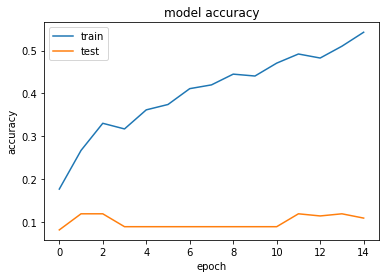

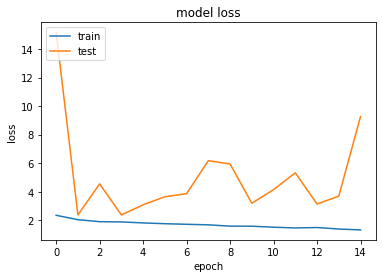

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=num_classes)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=num_classes,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Inception_V3

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_42 (BatchNo (None, 63, 63, 32)   96          conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization_42[0][0]     
___________________________

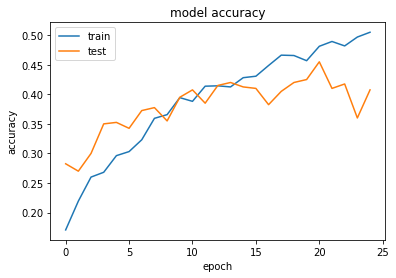

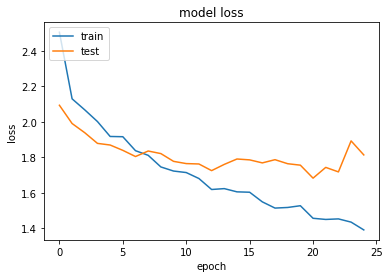

In [ ]:


from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=num_classes, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()




batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])


now = datetime.now
t= now()

# t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')



epoch=25

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



### Inception_V3 model for 100 epochs

2022-11-26 08:28:01.151273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 08:28:01.152223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 08:28:01.152992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 08:28:01.153715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 08:28:01.154420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_____________________________

2022-11-26 08:28:04.747557: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-26 08:28:10.798066: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 27s 195ms/step - loss: 2.4689 - accuracy: 0.1612 - val_loss: 2.1440 - val_accuracy: 0.2600

Epoch 00001: val_accuracy improved from -inf to 0.26000, saving model to inception_v3_model-100.hdf5
Epoch 2/100
50/50 [==============================] - 8s 154ms/step - loss: 2.1263 - accuracy: 0.2431 - val_loss: 1.9975 - val_accuracy: 0.2825

Epoch 00002: val_accuracy improved from 0.26000 to 0.28250, saving model to inception_v3_model-100.hdf5
Epoch 3/100
50/50 [==============================] - 8s 166ms/step - loss: 2.0620 - accuracy: 0.2456 - val_loss: 1.9358 - val_accuracy: 0.3175

Epoch 00003: val_accuracy improved from 0.28250 to 0.31750, saving model to inception_v3_model-100.hdf5
Epoch 4/100
50/50 [==============================] - 7s 149ms/step - loss: 1.9914 - accuracy: 0.2731 - val_loss: 1.9005 - val_accuracy: 0.3275

Epoch 00004: val_accuracy improved from 0.31750 to 0.32750, saving model to inception_v3_model-100.hdf5
Epoch 5/100
50/50 [===

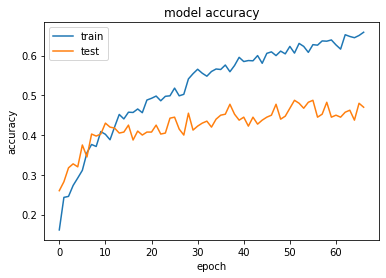

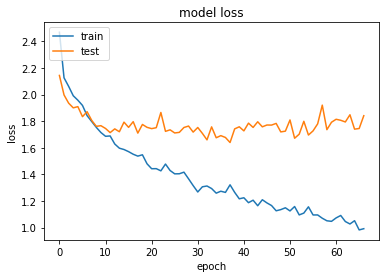

In [ ]:


from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=num_classes, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()



batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])


now = datetime.now
t= now()

# t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'inception_v3_model-100.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')



epoch=100

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)


print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# VGG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

58900480/58889256 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
____________________________________________________________

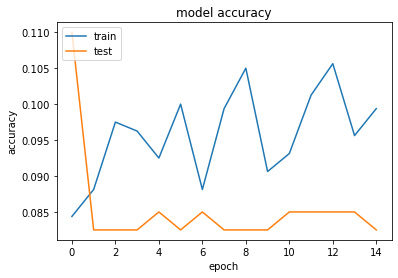

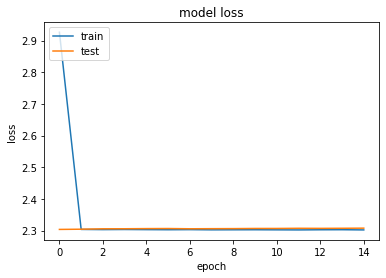

In [ ]:


vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=x_train.shape[1:],classes=58)

x = vgg16.output

x = GlobalAveragePooling2D()(x)

x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)



output = Dense(units=num_classes,activation = 'softmax')(x)
model_vgg16 = Model(vgg16.input, output)
model_vgg16.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_vgg16.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'vgg16_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_vgg16.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

